In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/clean-16-million-tweets/clean_tweets_again.csv
/kaggle/input/term-frequency-of-16-million-tweets/term_freq_df.csv


In [2]:
import pandas as pd
df = pd.read_csv("../input/term-frequency-of-16-million-tweets/term_freq_df.csv")

** zips law suggests that in a corpora when the words are arranged in decreasing order of their frequencies the product of their rank and frequency remains a constant or rank and frequency have a inverse relation**

In [3]:
zip_df = df[['total']]
zip_df = zip_df.reset_index().sort_values(by = 'total',ascending = False)
zip_df['product'] = zip_df['index'] * zip_df['total']
frame_to_plot = zip_df['product']


In [4]:
frame_to_plot = frame_to_plot.drop(columns = 'index').reset_index().iloc[0:500,:]
frame_to_plot = frame_to_plot.reset_index()

Text(0.5, 0, 'top 500 tokens in the tweet')

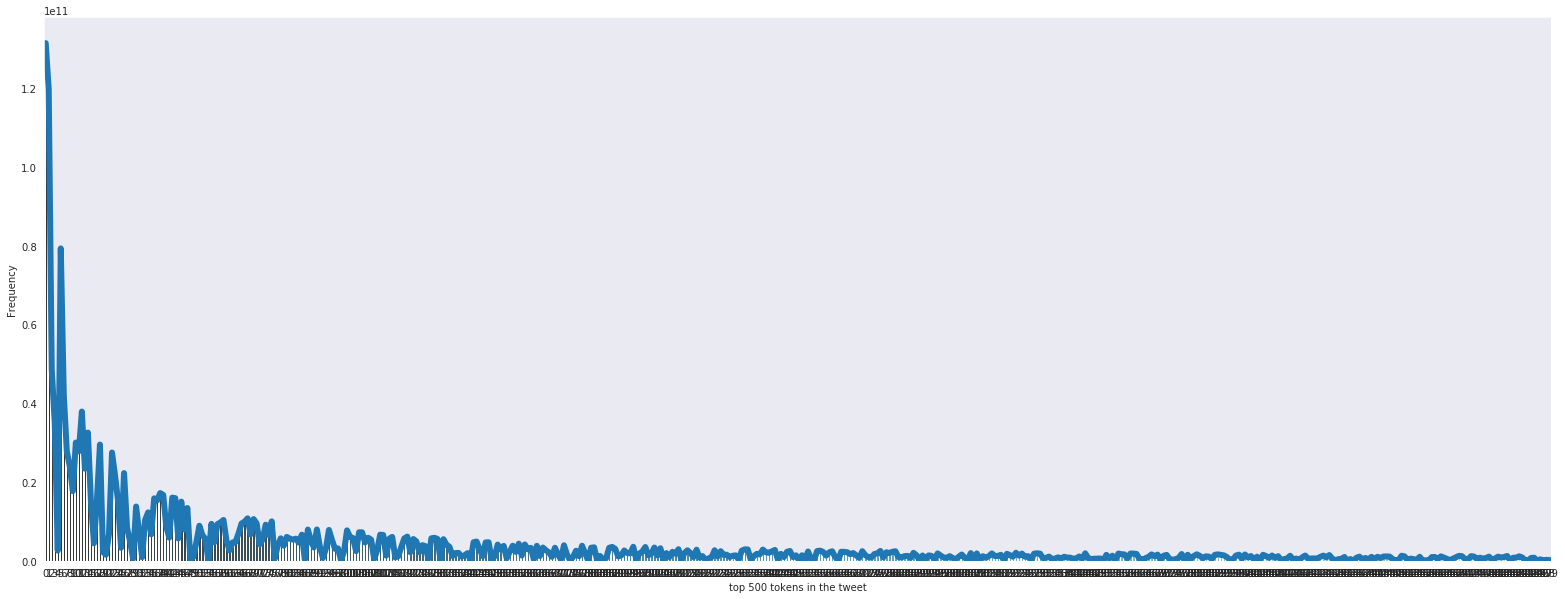

In [5]:
sns.set_style("dark")
sns.set_style("dark")
plt.figure(figsize = (27,10))
sns.lineplot(data = frame_to_plot,x = 'level_0',y = 'product', markers=True, dashes=False,linewidth=6)
sns.barplot(data = frame_to_plot,x = 'level_0',y = 'product',palette = "GnBu_d")
plt.ylabel('Frequency')
plt.xlabel('top 500 tokens in the tweet')

** zips law suggests that in a corpora when the words are arranged in decreasing order of their frequencies the product of their rank and frequency remains a constant or rank and frequency have a inverse relation and in other words some words are used often while some words are rarely used in the language eventhough the above distribution dosenot follow a strict zips law it shows us the trends in words**

In [6]:
frame_to_plot['log_product'] = np.log(frame_to_plot['product'])
frame_to_plot['log_rank'] = np.log(frame_to_plot['index'])

Text(0.5, 0, 'top 500 tokens in the tweet')

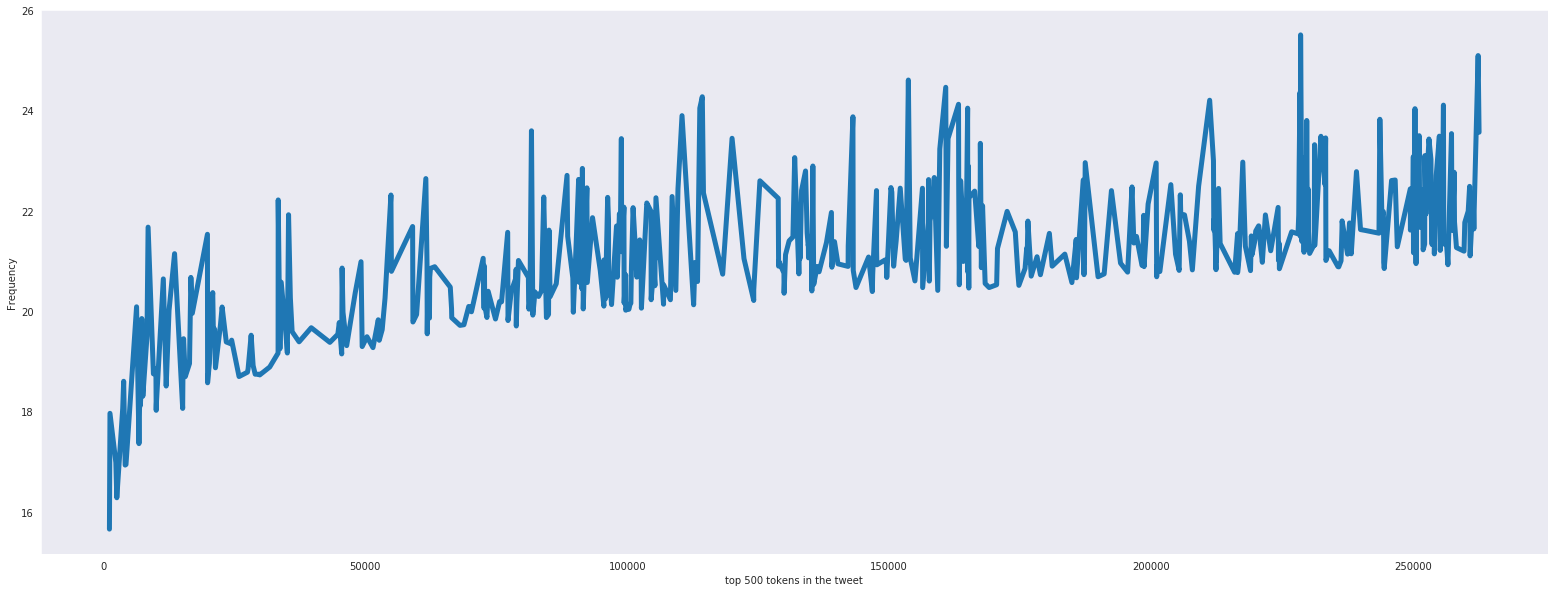

In [7]:
frame_to_plot = frame_to_plot.iloc[1:,:]
sns.set_style("dark")
sns.set_style("dark")
plt.figure(figsize = (27,10))
sns.lineplot(data = frame_to_plot,x = 'index',y = 'log_product', markers=True, dashes=False,palette = "GnBu_d",linewidth=5)
#sns.barplot(data = frame_to_plot,x = 'index',y = 'log_product',palette = "GnBu_d")
plt.ylabel('Frequency')
plt.xlabel('top 500 tokens in the tweet')

**using zips law we observed how the tokens are distributed through the whole corpus in this section we will analyze how different the tokens are in each sentiment class so to visualize this lets remove stopwords as they do not play any major role in analysis and lets limit the features to 10000**

In [8]:
import pandas as pd
tweets_df = pd.read_csv("../input/clean-16-million-tweets/clean_tweets_again.csv")
tweets_df = tweets_df.drop(columns = ['Unnamed: 0'])
tweets_df.dropna(inplace = True)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(stop_words = 'english',
                            max_features = 10000
                           )
doc_sparse_matrix = count_vec.fit(tweets_df['text'])

In [10]:
neg_doc_matrix = count_vec.transform(tweets_df[tweets_df['sentiment'] == 0]['text'])
#this gives a sparse matrix of all the features
pos_doc_matrix = count_vec.transform(tweets_df[tweets_df['sentiment'] == 1]['text'])
neg_tf = np.sum(neg_doc_matrix,axis = 0)
#in this statement we are calculating the sum of frequencies for each feature
pos_tf = np.sum(pos_doc_matrix,axis = 0)
neg = np.squeeze(np.array(neg_tf))
# the sum of frequency obtained is in matrix form so we convert the 2d matrix into 1d numpy array by removing the extra
#dimensions
pos = np.squeeze(np.array(pos_tf))
term_frequency_pandas_dataframe = pd.DataFrame([neg,pos],columns = count_vec.get_feature_names()).T

In [11]:
term_frequency_pandas_dataframe.columns = ['positive','negative']
term_frequency_pandas_dataframe['total'] = term_frequency_pandas_dataframe['positive'] + term_frequency_pandas_dataframe['negative']

In [12]:
#this data frame is without stopwords
tf_df = term_frequency_pandas_dataframe
tf_df.sort_values(by = 'total',ascending = False)[:9] 
#this are the most frequent words in the dataframe both positive and negative

,positive,negative,total
just,64004,62944,126948
good,29209,62118,91327
day,41374,48186,89560
like,41050,37520,78570
today,38116,30100,68216
work,45420,19529,64949
love,16990,47694,64684
going,33689,30939,64628
got,33408,28037,61445


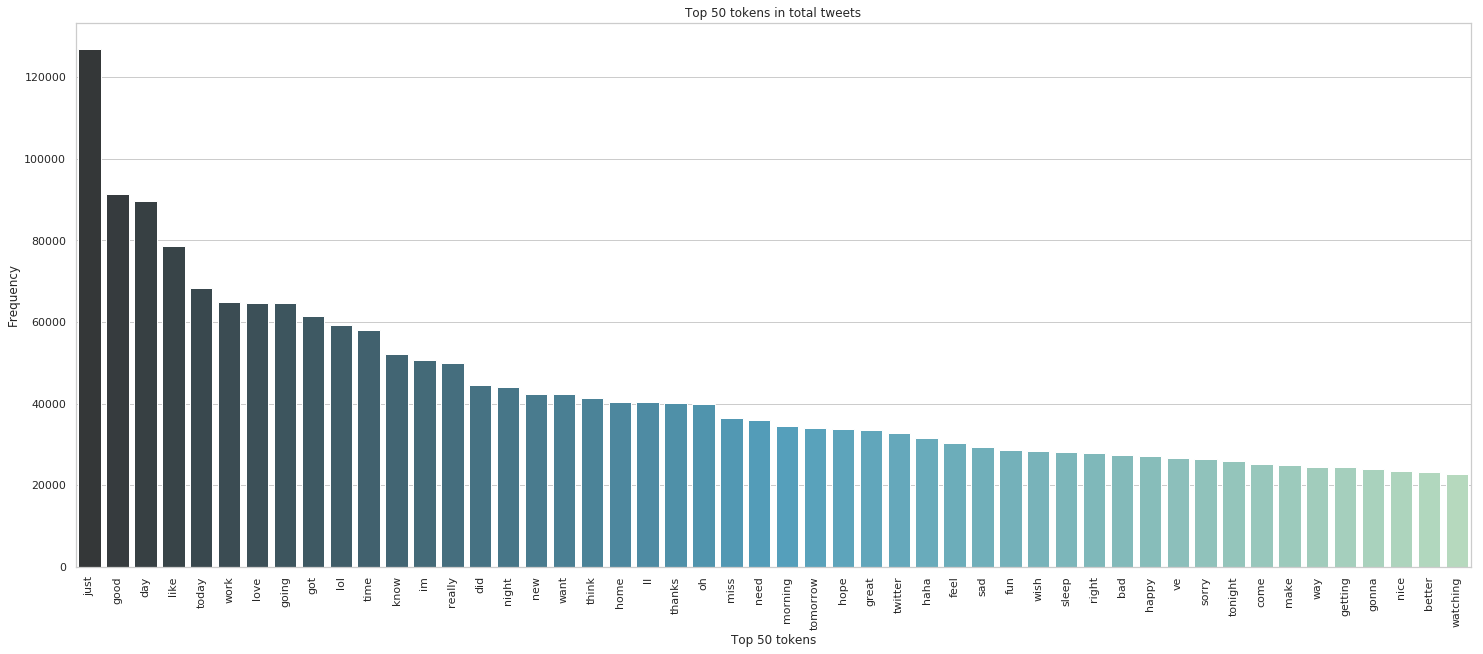

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
total_data_frame = tf_df.reset_index().sort_values(by = 'total',ascending = False)[:50]
sns.barplot(data = total_data_frame,x = 'index',y = 'total',palette="GnBu_d")
#sns.lineplot(data = total_data_frame,x = 'index',y = 'total',palette="GnBu_d")
plt.xlabel('Top 50 tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in total tweets')
plt.xticks(rotation=90)
plt.show()

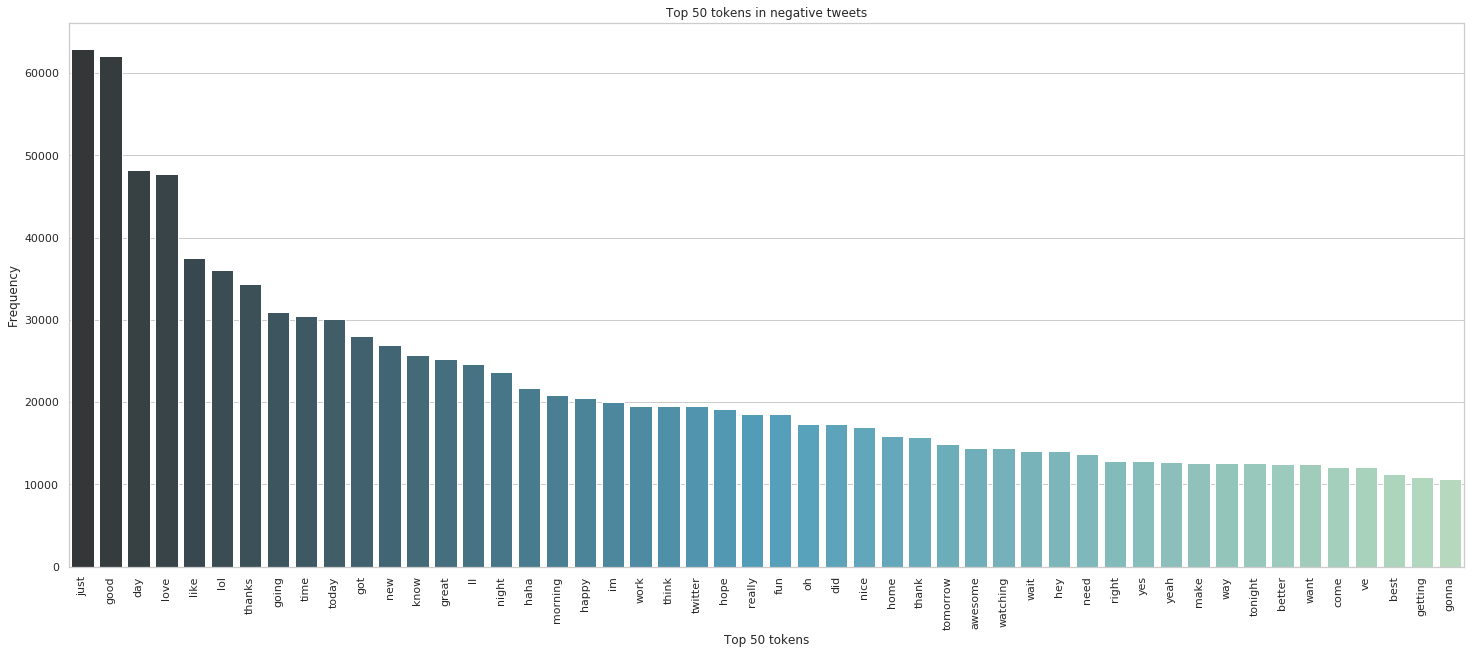

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
total_data_frame = tf_df.reset_index().sort_values(by = 'negative',ascending = False)[:50]
sns.barplot(data = total_data_frame,x = 'index',y = 'negative',palette="GnBu_d")
#sns.lineplot(data = total_data_frame,x = 'index',y = 'total',palette="GnBu_d")
plt.xlabel('Top 50 tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in negative tweets')
plt.xticks(rotation=90)
plt.show()

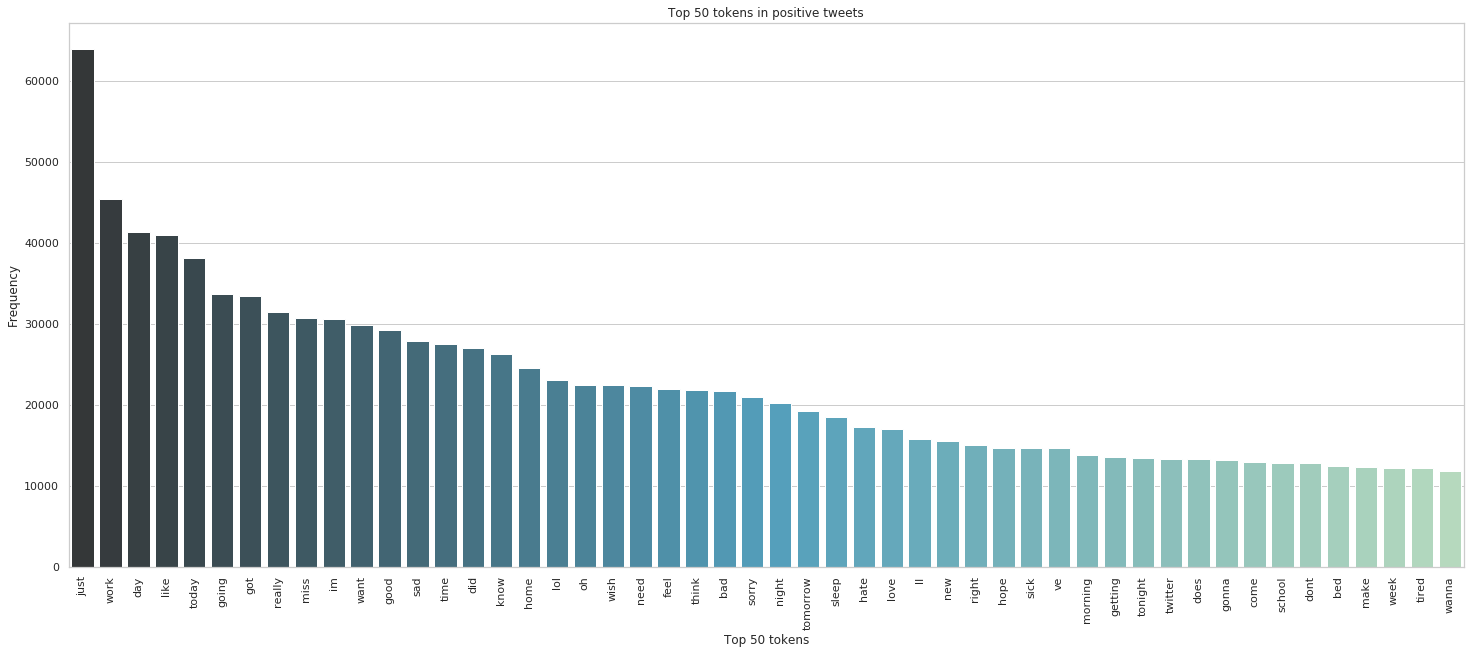

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
total_data_frame = tf_df.reset_index().sort_values(by = 'positive',ascending = False)[:50]
sns.barplot(data = total_data_frame,x = 'index',y = 'positive',palette="GnBu_d")
#sns.lineplot(data = total_data_frame,x = 'index',y = 'total',palette="GnBu_d")
plt.xlabel('Top 50 tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in positive tweets')
plt.xticks(rotation=90)
plt.show()

**From above three graphs we got some intution about what are positive tokens and what are negative tokens and how some of the neutral words are
prevaling in all the three graphs**

**lets plot a graph of positive words frequency against negative word frequency**

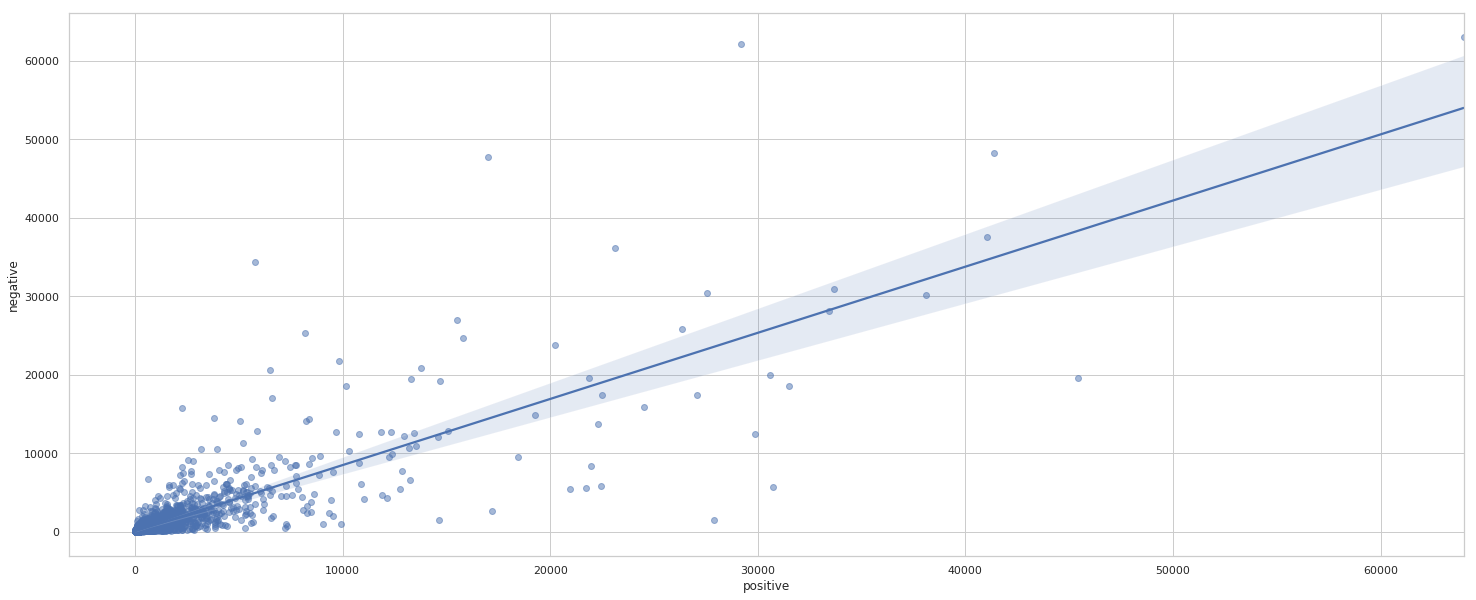

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
sns.regplot(data = tf_df,x = 'positive',y = 'negative',scatter_kws = {'alpha':0.5})

**most of the words are below 10000 frequency in case of both positive and negative to get more information about the words in the corpus so we make use of a metric called pos_rate **
* intuitively speaking if a word apperas more often in one class compared with other class this can be a good measure of how much the word is meaningful to the characteristic of the class

In [17]:
tf_df['pos_rate'] = tf_df['positive'] / tf_df['total']

In [18]:
tf_df.sort_values(by = 'pos_rate',ascending = False)[:20] #from the metric pos_rate we understand that words with highest pos_rate have very less frequency in the negative words
#but the overall frequency of this words is too low to think it as a guideline for positive tweets

,positive,negative,total,pos_rate
neda,97,0,97,1.000000
isplayer,210,0,210,1.000000
dontyouhate,106,0,106,1.000000
happybdaykrisallen,71,0,71,1.000000
inaperfectworld,189,0,189,1.000000
fawcett,379,0,379,1.000000
pakcricket,82,0,82,1.000000
sadd,108,2,110,0.981818
saddens,102,2,104,0.980769
farrah,541,12,553,0.978300


**another metric which can be defined as frequency that the word occurs in the class**

In [19]:
tf_df['pos_freq_total'] = tf_df['positive'] / tf_df['positive'].sum()

In [20]:
tf_df.sort_values(by = 'pos_freq_total',ascending = False)[:20] #from the metric pos_rate we understand that words with highest pos_rate have very less frequency in the negative words
#but the overall frequency of this words is too low to think it as a guideline for positive tweets

,positive,negative,total,pos_rate,pos_freq_total
just,64004,62944,126948,0.504175,0.013964
work,45420,19529,64949,0.699318,0.009909
day,41374,48186,89560,0.461970,0.009027
like,41050,37520,78570,0.522464,0.008956
today,38116,30100,68216,0.558755,0.008316
going,33689,30939,64628,0.521276,0.007350
got,33408,28037,61445,0.543706,0.007289
really,31496,18524,50020,0.629668,0.006872
miss,30713,5676,36389,0.844019,0.006701
im,30609,19967,50576,0.605208,0.006678


**pos_freq_total is just the frquency scaled by the sum of all the frequency hence it is exactly same as the total frequency we are combining the pos_rate with pos_freq_total which will give us a new and meaningful metric which will be useful to find the relationships but when we look at the both values we see that pos_rate is quite dominant than pos_freq_total hence if we combine them both one will diminish the importance of other hence instead of taking average we will take the harmonic mean which will help us in overcoming this problem**

In [21]:
from scipy.stats import hmean
tf_df['hmean_of_rate_total'] = tf_df.apply(lambda x : (hmean([x['pos_rate'],x['pos_freq_total']]) if x['pos_rate'] > 0 and x['pos_freq_total'] > 0 else 0),axis = 1)

In [22]:
tf_df.sort_values(by = 'hmean_of_rate_total',ascending = False)[:20] #from the metric pos_rate we understand that words with highest pos_rate have very less frequency in the negative words
#but the overall frequency of this words is too low to think it as a guideline for positive tweets

,positive,negative,total,pos_rate,pos_freq_total,hmean_of_rate_total
just,64004,62944,126948,0.504175,0.013964,0.027175
work,45420,19529,64949,0.699318,0.009909,0.019542
day,41374,48186,89560,0.461970,0.009027,0.017707
like,41050,37520,78570,0.522464,0.008956,0.017610
today,38116,30100,68216,0.558755,0.008316,0.016388
going,33689,30939,64628,0.521276,0.007350,0.014496
got,33408,28037,61445,0.543706,0.007289,0.014385
really,31496,18524,50020,0.629668,0.006872,0.013595
miss,30713,5676,36389,0.844019,0.006701,0.013296
im,30609,19967,50576,0.605208,0.006678,0.013210


**when we look at the tabel it is the same as pos_freq_total this dosen't provide any insite**

In [23]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x,x.mean(),x.std())
tf_df['pos_rate_cdf'] = normcdf(tf_df['pos_rate'])
tf_df['pos_freq_total_cdf'] = normcdf(tf_df['pos_freq_total'])
tf_df['hmean_positive_cdf'] = hmean([tf_df['pos_rate_cdf'],tf_df['pos_freq_total_cdf']])

In [24]:
tf_df['neg_rate'] = tf_df['negative'] / tf_df['total']
tf_df['neg_freq_total'] = tf_df['negative'] / tf_df['negative'].sum()
tf_df['hmean_of_rate_total_negative'] = tf_df.apply(lambda x : (hmean([x['neg_rate'],x['neg_freq_total']]) if x['neg_rate'] > 0 and x['neg_freq_total'] > 0 else 0),axis = 1)

In [25]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x,x.mean(),x.std())
tf_df['neg_rate_cdf'] = normcdf(tf_df['neg_rate'])
tf_df['neg_freq_total_cdf'] = normcdf(tf_df['neg_freq_total'])
tf_df['hmean_negative_cdf'] = hmean([tf_df['neg_rate_cdf'],tf_df['neg_freq_total_cdf']])

In [26]:
tf_df.sort_values(by = 'hmean_negative_cdf')[:20]

,positive,negative,total,pos_rate,pos_freq_total,hmean_of_rate_total,pos_rate_cdf,pos_freq_total_cdf,hmean_positive_cdf,neg_rate,neg_freq_total,hmean_of_rate_total_negative,neg_rate_cdf,neg_freq_total_cdf,hmean_negative_cdf
inaperfectworld,189,0,189,1.000000,0.000041,0.000082,0.999167,0.444816,0.615582,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
isplayer,210,0,210,1.000000,0.000046,0.000092,0.999167,0.449094,0.619667,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
pakcricket,82,0,82,1.000000,0.000018,0.000036,0.999167,0.423128,0.594498,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
neda,97,0,97,1.000000,0.000021,0.000042,0.999167,0.426156,0.597480,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
dontyouhate,106,0,106,1.000000,0.000023,0.000046,0.999167,0.427975,0.599265,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
happybdaykrisallen,71,0,71,1.000000,0.000015,0.000031,0.999167,0.420911,0.592306,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
fawcett,379,0,379,1.000000,0.000083,0.000165,0.999167,0.483695,0.651836,0.000000,0.000000e+00,0.000000e+00,0.000833,0.410872,0.001663
sadd,108,2,110,0.981818,0.000024,0.000047,0.998775,0.428379,0.599591,0.018182,4.569994e-07,9.139759e-07,0.001225,0.411273,0.002443
saddens,102,2,104,0.980769,0.000022,0.000045,0.998748,0.427166,0.598397,0.019231,4.569994e-07,9.139772e-07,0.001252,0.411273,0.002496
farrah,541,12,553,0.978300,0.000118,0.000236,0.998682,0.516982,0.681286,0.021700,2.741997e-06,5.483300e-06,0.001318,0.413276,0.002627


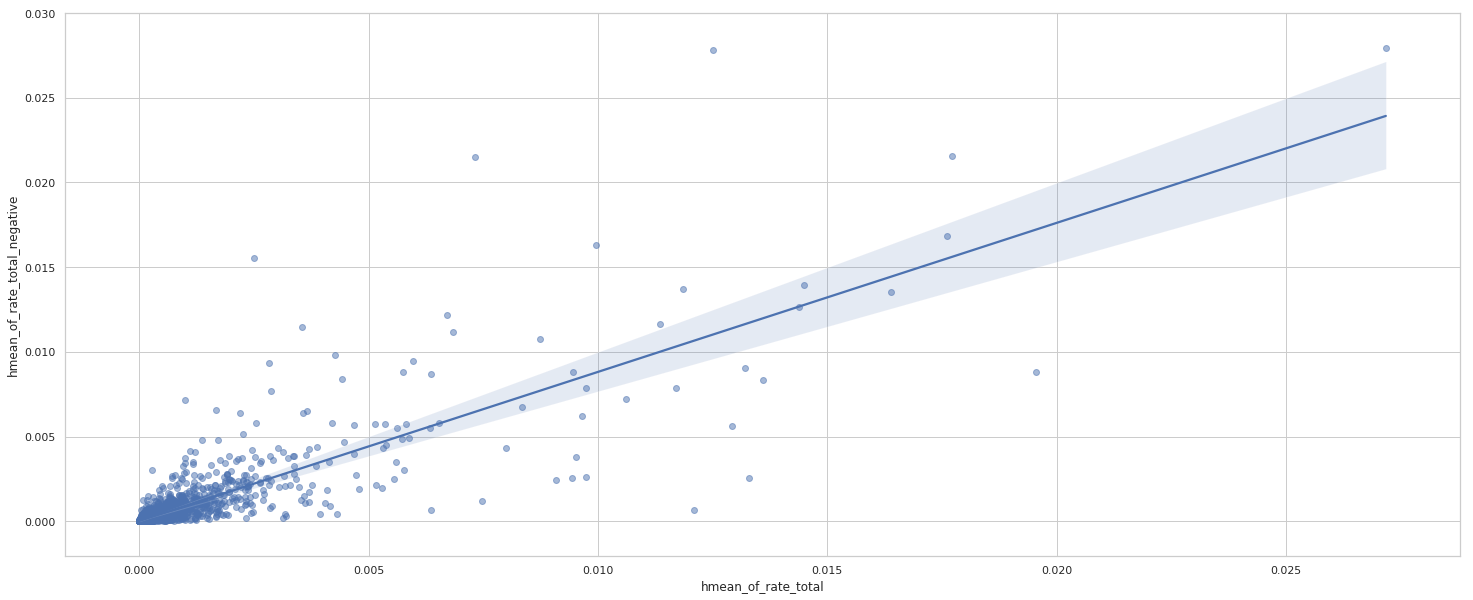

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
sns.regplot(data = tf_df,x = 'hmean_of_rate_total',y = 'hmean_of_rate_total_negative',scatter_kws = {'alpha':0.5})

In [28]:
# there is no diffrence

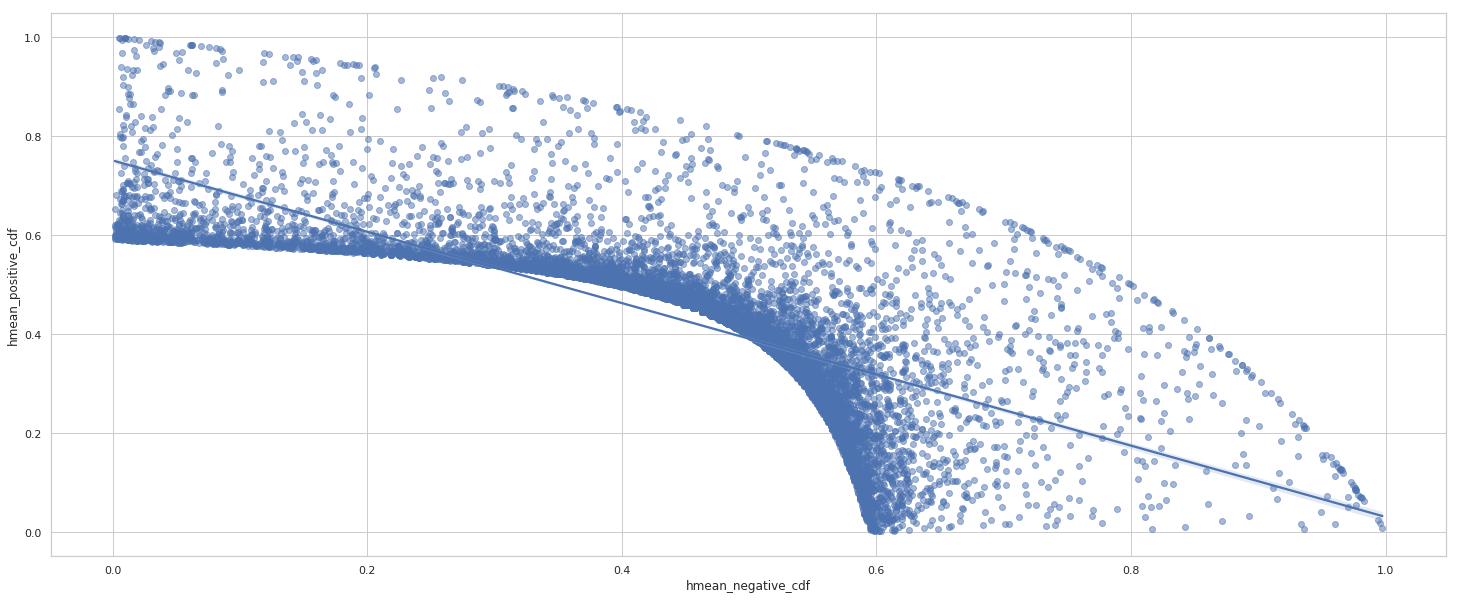

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize = (25,10))
sns.regplot(data = tf_df,y = 'hmean_positive_cdf',x = 'hmean_negative_cdf',scatter_kws = {'alpha':0.5})


In [30]:
tf_df

,positive,negative,total,pos_rate,pos_freq_total,hmean_of_rate_total,pos_rate_cdf,pos_freq_total_cdf,hmean_positive_cdf,neg_rate,neg_freq_total,hmean_of_rate_total_negative,neg_rate_cdf,neg_freq_total_cdf,hmean_negative_cdf
aa,160,92,252,0.634921,0.000035,0.000070,0.800848,0.438919,0.567053,0.365079,0.000021,0.000042,0.199152,0.429385,0.272102
aaa,93,54,147,0.632653,0.000020,0.000041,0.796836,0.425348,0.554634,0.367347,0.000012,0.000025,0.203164,0.421717,0.274221
aaaa,45,29,74,0.608108,0.000010,0.000020,0.750411,0.415679,0.535002,0.391892,0.000007,0.000013,0.249589,0.416688,0.312185
aaaah,76,61,137,0.554745,0.000017,0.000033,0.632956,0.421918,0.506327,0.445255,0.000014,0.000028,0.367044,0.423128,0.393095
aaaand,33,37,70,0.471429,0.000007,0.000014,0.426598,0.413270,0.419828,0.528571,0.000008,0.000017,0.573402,0.418296,0.483720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zune,87,57,144,0.604167,0.000019,0.000038,0.742464,0.424137,0.539870,0.395833,0.000013,0.000026,0.257536,0.422322,0.319958
zzz,88,96,184,0.478261,0.000019,0.000038,0.443535,0.424339,0.433725,0.521739,0.000022,0.000044,0.556465,0.430194,0.485249
zzzz,53,65,118,0.449153,0.000012,0.000023,0.372462,0.417287,0.393602,0.550847,0.000015,0.000030,0.627538,0.423934,0.506023
zzzzz,44,47,91,0.483516,0.000010,0.000019,0.456636,0.415478,0.435086,0.516484,0.000011,0.000021,0.543364,0.420308,0.473979
